arrival
[1.49999978e+01 2.25996574e-06 1.00000005e+00 9.99999760e+00
 2.34672029e-06 9.00000007e+00 1.59999999e+01 2.75300715e-07
 9.99999978e+00 1.99999981e+01 1.79183784e-06 9.99999943e-01]
order
[1.00000000e+00 9.20606757e-11 5.00290984e-05 1.00000000e+00
 9.54889061e-11 1.00000000e+00 1.00000000e+00 3.20075002e-08
 1.00000000e+00 1.00000000e+00 7.87859908e-11 5.00290932e-05]
stock
[10.99999782  2.00000008  2.00000014  7.99999773  2.00000008  2.00000015
  2.0000001   2.00000037  2.00000015  5.99999829  2.00000008  2.00000002]


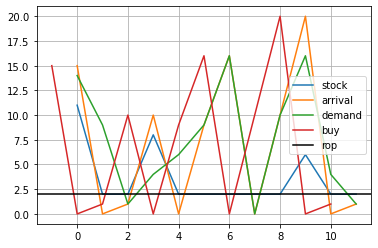

In [29]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

np.random.seed(555)
n_months = 12
initial_stock = 10
demand = np.random.randint(20, size=12)

processing_fee = 10
unit_price = 5
storage_fee = 1
lead_time = 1
min_stock = 2

arrival = cp.Variable(n_months, name='arrival') # buy shifted to the right
order = cp.Variable(n_months, name='order', boolean=True)
stock = cp.cumsum(arrival - demand) + initial_stock # current stock

cost = cp.sum(processing_fee* order) + cp.sum(unit_price * arrival) + cp.sum(storage_fee * stock)

constraints = [
    stock >= min_stock,
    arrival >= 0,
    arrival <= 20000*order # linearize minimimum(arrival, 1). Minimum is concave so cant' do it that way.
]

obj = cp.Minimize(cost)

prob = cp.Problem(obj, constraints)
prob.solve(solver='ECOS_BB')

print('arrival')
print(arrival.value)
print('order')
print(order.value)
print('stock')
print(stock.value)

time = np.arange(len(arrival.value))

plt.plot(stock.value, label='stock')
plt.plot(arrival.value, label='arrival')
plt.plot(demand, label='demand')

xs_with_lead_time = time - lead_time

plt.plot(xs_with_lead_time, arrival.value, label='buy')



# rop is maximum stock when order occur.
has_order = np.array(np.where(order.value > 0.1)) - lead_time
has_order = has_order[has_order >=0.1]

rop = max(stock.value[has_order])
plt.axhline(rop, label='rop', color='k')

plt.legend()
plt.grid()
